# Proyek Analisis Data: Brazilian E-Commerce (Olist Store)


*   **Nama:** Riza Nursyah
*   **Email:** rizanursyah02@gmail.com
*   **ID Dicoding:** lumeezy





## Menentukan Pertanyaan Bisnis


*   Apakah terdapat korelasi antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan?
*   Bagaimana rata-rata harga produk berbeda-beda menurut kategori, dan kategori mana yang paling diminati oleh pelanggan?
*   Apakah ada pola pembelian tertentu yang terjadi di hari-hari tertentu dalam seminggu?
*   Apakah terdapat tren pembelian tertentu yang dapat diidentifikasi dari data historis, seperti peningkatan penjualan atau penurunan penjualan?





## Import Package/Library yang Digunakan

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [70]:
# Tabel Order Items
orderItems_df = pd.read_csv('https://raw.githubusercontent.com/rizanss/Brazilian-Ecommerce-Analysis/main/dashboard/order_items_dataset.csv')
orderItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [71]:
# Tabel Order Reviews
orderReviews_df = pd.read_csv('https://raw.githubusercontent.com/rizanss/Brazilian-Ecommerce-Analysis/main/dashboard/order_reviews_dataset.csv')
orderReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [72]:
# Tabel Orders
orders_df = pd.read_csv('https://raw.githubusercontent.com/rizanss/Brazilian-Ecommerce-Analysis/main/dashboard/orders_dataset.csv')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [73]:
# Tabel Product Category
productCategory_df = pd.read_csv('https://raw.githubusercontent.com/rizanss/Brazilian-Ecommerce-Analysis/main/dashboard/product_category_name_translation.csv')
productCategory_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [74]:
# Tabel Products
products_df = pd.read_csv('https://raw.githubusercontent.com/rizanss/Brazilian-Ecommerce-Analysis/main/dashboard/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

#### orderItems_df

In [75]:
# Menilai data orderItems_df
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [76]:
# Memeriksa missing values pada orderItems_df
orderItems_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [77]:
# Memeriksa duplikasi pada orderItems_df
print('Jumlah Duplikasi: ', orderItems_df.duplicated().sum())

Jumlah Duplikasi:  0


In [78]:
# Memeriksa parameter statistik pada orderItems_df
orderItems_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### orderReviews_df

In [79]:
# Menilai data orderReviews_df
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [80]:
# Memeriksa missing values pada orderReviews_df
orderReviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [81]:
# Memeriksa duplikasi pada orderReviews_df
print('Jumlah Duplikasi: ', orderReviews_df.duplicated().sum())

Jumlah Duplikasi:  0


In [82]:
# Memeriksa parameter statistik pada orderReviews_df
orderReviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### orders_df

In [83]:
# Menilai data orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [84]:
# Memeriksa missing values pada orders_df
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [85]:
# Memeriksa duplikasi pada orders_df
print('Jumlah Duplikasi: ', orders_df.duplicated().sum())

Jumlah Duplikasi:  0


In [86]:
# Memeriksa parameter statistik pada orders_df
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### productCategory_df

In [87]:
# Menilai data productCategory_df
productCategory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [88]:
# Memeriksa missing values pada productCategory_df
productCategory_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [89]:
# Memeriksa duplikasi pada productCategory_df
print('Jumlah Duplikasi: ', productCategory_df.duplicated().sum())

Jumlah Duplikasi:  0


In [90]:
# Memeriksa parameter statistik pada productCategory_df
productCategory_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### products_df

In [91]:
# Menilai data products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [92]:
# Memeriksa missing values pada products_df
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [93]:
# Memeriksa duplikasi data
print('Jumlah Duplikasi: ', products_df.duplicated().sum())

Jumlah Duplikasi:  0


In [94]:
# Memeriksa parameter statistik pada products_df
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Cleaning Data

In [95]:
# Mengganti tipe data pada kolom shipping_limit_date di orderItems_df
orderItems_df['shipping_limit_date'] = pd.to_datetime(orderItems_df['shipping_limit_date'])

In [96]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [97]:
# Mengatasi missing values pada orderReviews_df
orderReviews_df.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

In [98]:
# Mengganti tipe data pada kolom review_creation_date dan review_answer_timestamp di orderReviews_df menjadi datetime
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_columns:
  orderReviews_df[column] = pd.to_datetime(orderReviews_df[column])

In [99]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


In [100]:
# Mengganti tipe data pada kolom order_purchase_timestamp hingga order_estimated_delivery_date pada orders_df menjadi datetime
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                    'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [101]:
# Menangani missing values pada orders_df
orders_df['order_approved_at'].fillna(orders_df['order_approved_at'].median(), inplace=True)

In [102]:
orders_df['order_delivered_carrier_date'].fillna(orders_df['order_delivered_carrier_date'].median(), inplace=True)

In [103]:
orders_df['order_delivered_customer_date'].fillna(orders_df['order_delivered_customer_date'].median(), inplace=True)

In [104]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [105]:
# Menangani missing values pada products_df
# Mengatasi missing values pada kolom product_category_name dengan metode imputasi menggunakan moda (modus)
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)

In [106]:
# Mengatasi missing values pada kolom product_name_length, product_description_length, dan product_photos_qty dengan
# metode imputasi menggunakan median
products_df['product_name_lenght'].fillna(products_df['product_description_lenght'].median(), inplace=True)
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median(), inplace=True)

In [107]:
# Mengatasi missing values pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm
# dengan metode dropping
products_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

In [108]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32949 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32949 non-null  object 
 1   product_category_name       32949 non-null  object 
 2   product_name_lenght         32949 non-null  float64
 3   product_description_lenght  32949 non-null  float64
 4   product_photos_qty          32949 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## Exploratory Data Analysis (EDA)

### Explore Tabel orders_df dan orderReviews_df

In [109]:
## Menggabungkan data dari kedua tabel berdasarkan kolom 'order_id'

order_delivery_satisfaction_df = pd.merge(
    left = orders_df,
    right = orderReviews_df,
    how = 'inner',
    left_on = 'order_id',
    right_on = 'order_id'
)

order_delivery_satisfaction_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,2018-02-17,2018-02-18 13:02:51


In [110]:
# Membuat selisih waktu pengiriman pesanan dengan membuat kolom delivery_time
order_delivery_satisfaction_df['delivery_time'] = (order_delivery_satisfaction_df['order_delivered_customer_date'] - order_delivery_satisfaction_df['order_purchase_timestamp']).dt.days

# Menghitung korelasi antara waktu pengiriman pesanan dan review score untuk mengukur tingkat kepuasan pelanggan
correlation = order_delivery_satisfaction_df['delivery_time'].corr(order_delivery_satisfaction_df['review_score'])

print('Korelasi antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan: ', correlation)

Korelasi antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan:  -0.2001139173132936


In [111]:
order_delivery_satisfaction_df.to_csv('order_delivery_satisfaction_df.csv', index=False)

### Explore Tabel products_df dan orderItems_df

In [112]:
# Menggabungkan tabel products_df dan productCategory_df
product_category = pd.merge(
    left = products_df,
    right = productCategory_df,
    how = 'left',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)
product_category.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [113]:
# Gabungkan data products_df dengan order_items_df berdasarkan product_id untuk mengidentifikasi harga rata-rata produk per kategori
products_order_df = pd.merge(
    left = orderItems_df,
    right = product_category,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id'
)

products_order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [114]:
products_order_df.to_csv('products_order_df.csv', index=False)

In [115]:
# Menghitung rata-rata harga produk per kategori
avg_price_per_category = products_order_df.groupby('product_category_name_english').price.mean().sort_values(ascending=False).reset_index()
avg_price_per_category.head(5)

,product_category_name_english,price
0,computers,1098.340542
1,small_appliances_home_oven_and_coffee,624.285658
2,home_appliances_2,476.124958
3,agro_industry_and_commerce,342.124858
4,musical_instruments,281.616000


In [116]:
# Menghitung jumlah produk yang terjual untuk setiap kategori
product_sold_per_category = products_order_df.groupby('product_category_name_english').product_id.count().sort_values(ascending=False).reset_index()
product_sold_per_category.head(5)

,product_category_name_english,product_id
0,bed_bath_table,12701
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827


In [117]:
# menggabungkan informasi tentang rata-rata harga produk dan popularitas kategori
avg_popularity_product = pd.merge(
    left = avg_price_per_category,
    right = product_sold_per_category,
    left_on = 'product_category_name_english',
    right_on = 'product_category_name_english'
)

avg_popularity_product.sort_values(by='product_id', ascending=False)

,product_category_name_english,price,product_id
43,bed_bath_table,95.737419,12701
28,health_beauty,130.163531,9670
35,sports_leisure,114.344285,8641
50,furniture_decor,87.564494,8334
32,computers_accessories,116.513903,7827
...,...,...,...
54,arts_and_craftmanship,75.583750,24
18,la_cuisine,146.785000,14
67,cds_dvds_musicals,52.142857,14
58,fashion_childrens_clothes,71.231250,8


In [118]:
avg_popularity_product.to_csv('avg_popularity_product.csv', index=False)

### Explore Tabel orders_df

In [119]:
## Ekstrak hari dalam seminggu dari kolom order_purchase_timestamp
orders_df['day_of_week'] = orders_df['order_purchase_timestamp'].dt.day_name()

In [120]:
# Menghitung jumlah pesanan untuk setiap hari dalam seminggu
daily_orders = orders_df['day_of_week'].value_counts().reset_index()
daily_orders.columns = ['Day of Week', 'Number of Orders']

In [121]:
daily_orders.head(7)

,Day of Week,Number of Orders
0,Monday,16196
1,Tuesday,15963
2,Wednesday,15552
3,Thursday,14761
4,Friday,14122
5,Sunday,11960
6,Saturday,10887


In [122]:
daily_orders.to_csv('daily_orders.csv', index=False)

### Explore Tabel orders_df dan orderItems_df

In [123]:
order_items = pd.merge(
    left = orders_df,
    right = orderItems_df,
    how = 'inner',
    left_on = 'order_id',
    right_on = 'order_id'
)

order_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day_of_week,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tuesday,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wednesday,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Saturday,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tuesday,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,Tuesday,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,Sunday,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Monday,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Monday,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [124]:
# Mengatur kolom waktu sebagai indeks DataFrame
order_items.set_index('order_purchase_timestamp', inplace=True)

In [125]:
# Menghitung jumlah pesanan per bulan
monthly_orders = order_items.resample('M').size().reset_index()
monthly_orders.columns = ['Date', 'Number of Orders']
monthly_orders.sort_values(by='Date', ascending=True).head(25)

,Date,Number of Orders
0,2016-09-30,6
1,2016-10-31,363
2,2016-11-30,0
3,2016-12-31,1
4,2017-01-31,955
5,2017-02-28,1951
6,2017-03-31,3000
7,2017-04-30,2684
8,2017-05-31,4136
9,2017-06-30,3583


In [126]:
monthly_orders.to_csv('monthly_orders.csv', index=False)

## Visualization & Explanatory Analysis

### Apakah terdapat korelasi antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan?

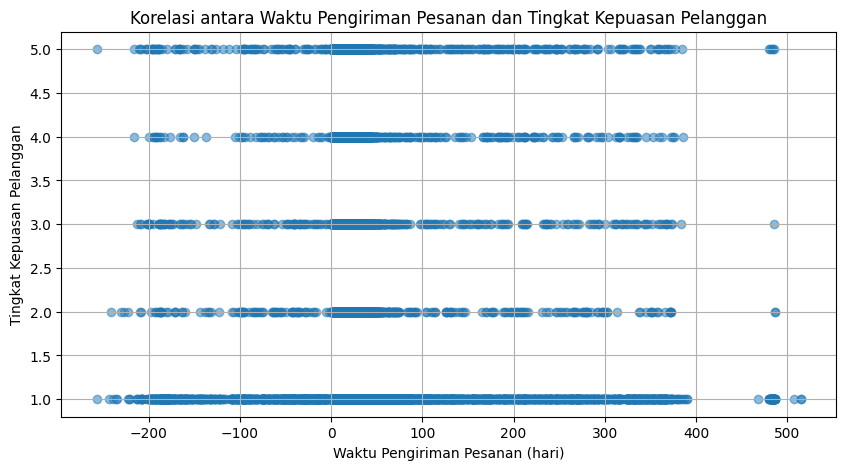

In [127]:
plt.figure(figsize=(10, 5))
plt.scatter(order_delivery_satisfaction_df['delivery_time'], order_delivery_satisfaction_df['review_score'], alpha=0.5)
plt.title('Korelasi antara Waktu Pengiriman Pesanan dan Tingkat Kepuasan Pelanggan')
plt.ylabel('Tingkat Kepuasan Pelanggan')
plt.xlabel('Waktu Pengiriman Pesanan (hari)')
plt.grid(True)
plt.show()

In [128]:
"""
Dari scatter plot tersebut, kita dapat melihat pola distribusi titik-titik data antara waktu pengiriman pesanan dan
tingkat kepuasan pelanggan. Jika ada korelasi antara kedua variabel tersebut, kita dapat melihat pola linear atau non-linear
yang menunjukkan hubungan antara waktu pengiriman dan tingkat kepuasan pelanggan.

Namun, jika scatter plot menunjukkan pola yang acak dan tersebar secara merata, ini menunjukkan bahwa tidak ada hubungan
yang jelas antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan.
"""

'\nDari scatter plot tersebut, kita dapat melihat pola distribusi titik-titik data antara waktu pengiriman pesanan dan\ntingkat kepuasan pelanggan. Jika ada korelasi antara kedua variabel tersebut, kita dapat melihat pola linear atau non-linear\nyang menunjukkan hubungan antara waktu pengiriman dan tingkat kepuasan pelanggan.\n\nNamun, jika scatter plot menunjukkan pola yang acak dan tersebar secara merata, ini menunjukkan bahwa tidak ada hubungan\nyang jelas antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan.\n'

### Bagaimana rata-rata harga produk berbeda-beda menurut kategori, dan kategori mana yang paling diminati oleh pelanggan?

<ipython-input-129-e6971f5aaad6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_popularity_product.head(5), x='price', y='product_category_name_english', palette=colors, ax=ax1)
<ipython-input-129-e6971f5aaad6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_popularity_product.sort_values(by='product_id', ascending=False).head(5), x='product_id', y='product_category_name_english', palette=colors, ax=ax2)


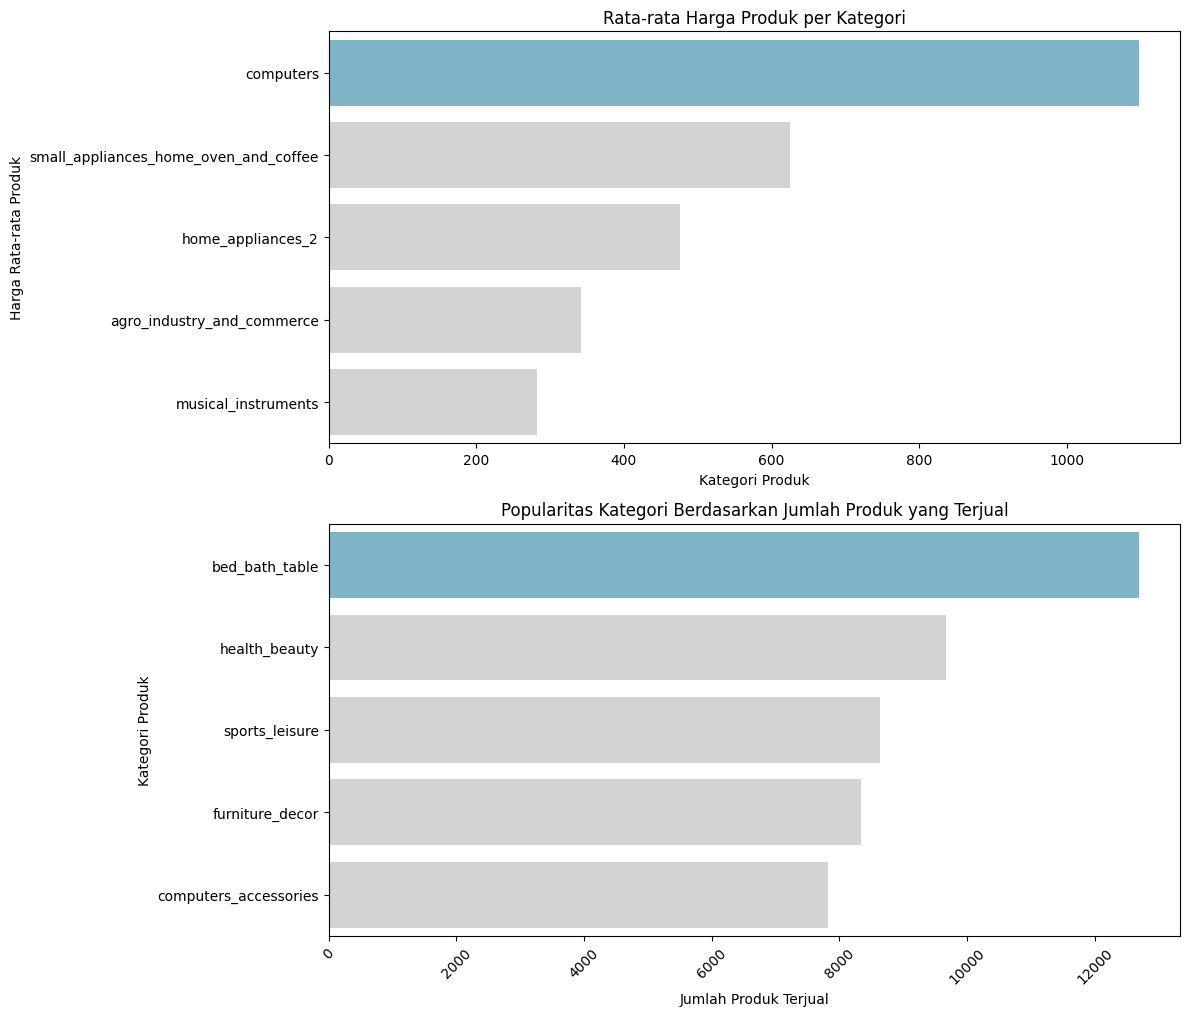

In [129]:
# Membuat dua subplot
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Subplot pertama: Bar plot untuk rata-rata harga produk per kategori
sns.barplot(data=avg_popularity_product.head(5), x='price', y='product_category_name_english', palette=colors, ax=ax1)
ax1.set_title('Rata-rata Harga Produk per Kategori')
ax1.set_xlabel('Kategori Produk')
ax1.set_ylabel('Harga Rata-rata Produk')


# Subplot kedua: Bar plot untuk popularitas kategori berdasarkan jumlah produk yang terjual
sns.barplot(data=avg_popularity_product.sort_values(by='product_id', ascending=False).head(5), x='product_id', y='product_category_name_english', palette=colors, ax=ax2)
ax2.set_title('Popularitas Kategori Berdasarkan Jumlah Produk yang Terjual')
ax2.set_xlabel('Jumlah Produk Terjual')
ax2.set_ylabel('Kategori Produk')

# Menampilkan plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Apakah ada pola pembelian tertentu yang terjadi di hari-hari tertentu dalam seminggu?

<ipython-input-130-03eba011a285>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_orders, x='Day of Week', y='Number of Orders', palette='viridis')


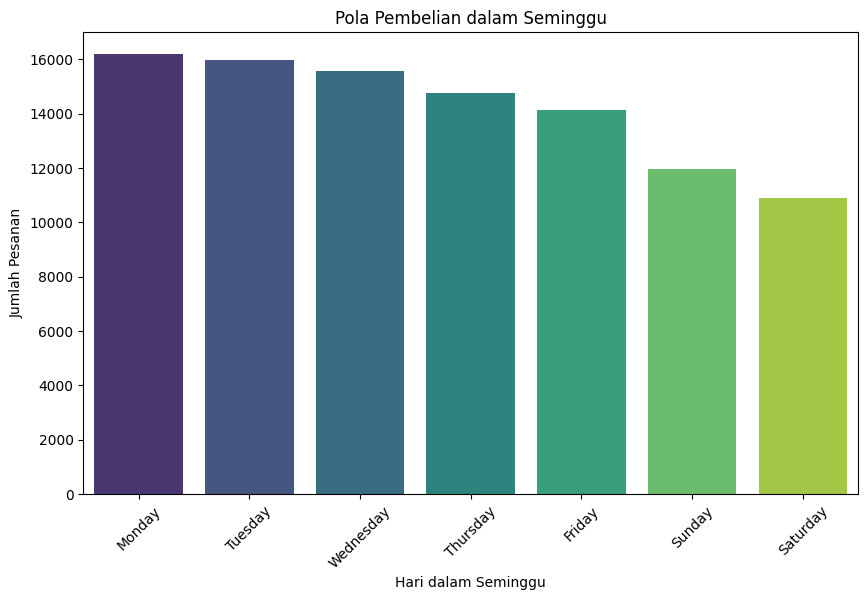

In [130]:
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_orders, x='Day of Week', y='Number of Orders', palette='viridis')
plt.title('Pola Pembelian dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.show()

### Apakah terdapat tren pembelian tertentu yang dapat diidentifikasi dari data historis, seperti peningkatan penjualan atau penurunan penjualan?

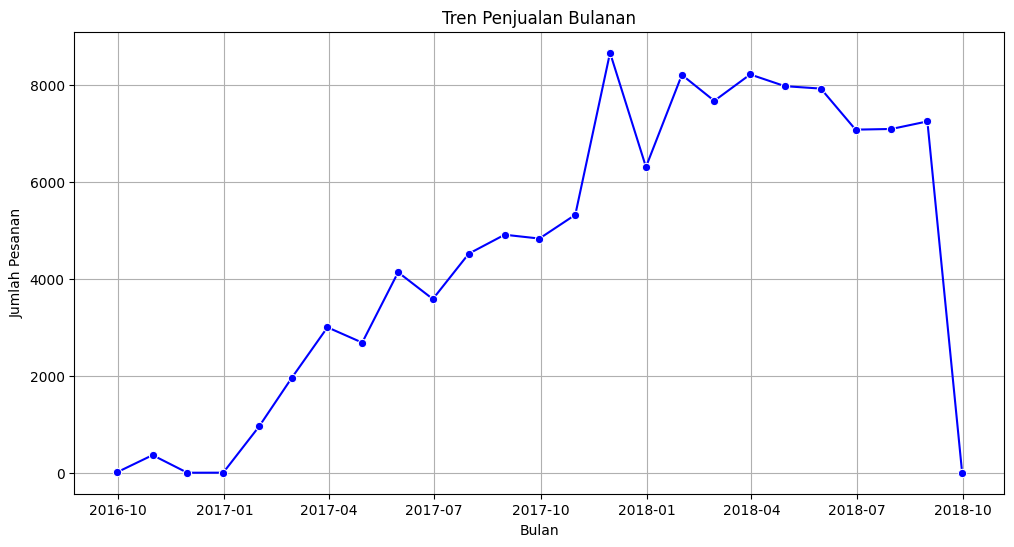

In [131]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, x='Date', y='Number of Orders', marker='o', color='blue')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.show()

## Conclusion



**Conclusion Pertanyaan 1:**
* Korelasi antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan sebesar -0.2001 menunjukkan adanya korelasi negatif yang lemah antara kedua variabel tersebut. Nilai korelasi negatif menunjukkan bahwa ada kecenderungan bahwa semakin lama waktu pengiriman pesanan, tingkat kepuasan pelanggan cenderung menurun. Namun, penting untuk diingat bahwa korelasi sebesar -0.2001 adalah lemah, yang berarti hubungan antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan tidak terlalu kuat.
* Dalam konteks ini, sementara ada korelasi negatif yang lemah antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan, tidak dapat disimpulkan bahwa waktu pengiriman secara langsung menyebabkan penurunan tingkat kepuasan pelanggan. Hal ini hanya menunjukkan bahwa ada hubungan yang lemah antara kedua variabel tersebut.


**Conclusion Pertanyaan 2:**
- Berdasarkan analisis ini, kita dapat menyarankan untuk lebih fokus pada kategori-kategori yang memiliki jumlah produk terjual tinggi namun harga produknya tidak terlalu tinggi. Selain itu, melakukan penyesuaian harga atau promosi pada kategori-kategori dengan harga tinggi namun jumlah produk terjual rendah dapat meningkatkan daya tarik bagi pelanggan.

**Conclusion Pertanyaan 3:**
-  Dari visualisasi, kita dapat melihat hari senin, selasa, dan rabu merupakan hari dimana pelanggan paling banyak membeli barang. Hal ini menunjukan bahwa hari tersebut memiliki jumlah pesanan yang lebih tinggi dibandingkan dengan hari yang lain.
- Perusahaan harus tetap memantau stok dan proses logistik mereka setiap hari untuk memastikan dapat mengakomodasi fluktuasi permintaan yang mungkin terjadi, namun diutamakan stok lebih banyak pada hari pembelian senin, selasa dan rabu dikarenakan permintaan yang tinggi pada hari tersebut.
- Analisis pola pembelian ini dapat menjadi dasar untuk merencanakan strategi pemasaran lanjutan, seperti penetapan harga produk, promosi, dan strategi pemasaran lainnya.

**Conclusion Pertanyaan 4:**
- Peningkatan penjualan yang signifikan pada bulan Desember 2017 dapat disebabkan oleh berbagai faktor, termasuk musim liburan dan perayaan seperti Natal dan Tahun Baru. Pelanggan cenderung melakukan pembelian lebih banyak untuk keperluan hadiah dan merayakan liburan.

- Bulan Februari 2018 juga menunjukkan peningkatan penjualan yang cukup besar. Ini mungkin disebabkan oleh perayaan Hari Valentine atau faktor musiman lainnya yang mendorong konsumen untuk melakukan pembelian tambahan.

- Berdasarkan tren penjualan yang ditemukan, perusahaan dapat merencanakan strategi pemasaran yang lebih efektif untuk mengoptimalkan penjualan di masa depan. Misalnya, mereka dapat meningkatkan promosi atau menawarkan diskon khusus selama periode puncak penjualan seperti bulan Desember dan Februari.